# Question 2

In [5]:
!pip install graphviz
import graphviz
import numpy as np

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [6]:
def viznn(input,weights_input_hidden,weights_hidden_output):
    # calculate the values of the neurons in the hidden layer & ouputlayer 
    hidden_values = np.dot(input, weights_input_hidden)
    output_values = np.dot(hidden_values, weights_hidden_output)

    # create a new graph object
    g = graphviz.Digraph(format='png')#, size="10,8",nodesep ="1.5")
    g.attr(splines='line')  # set the edges to use straight lines
    g.attr(rankdir='BT') # change the layout to rankdir='BT' for bottom-to-top orientation

    # add nodes
    g.node('x1', label=f'{input[0]}')
    g.node('x2', label=f'{input[1]}')
    g.node('h1', label=f'{hidden_values[0]:.2f}')
    g.node('h2', label=f'{hidden_values[1]:.2f}')
    g.node('h3', label=f'{hidden_values[2]:.2f}')
    g.node('y1', label=f'{output_values[0]:.2f}')
    g.node('y2', label=f'{output_values[1]:.2f}')

    # connect nodes from input to hidden layer with weights
    for i, input in enumerate(['x1', 'x2']):
        for j, h in enumerate(['h1', 'h2', 'h3']):
            weight = weights_input_hidden[i, j]
            g.edge(input, h, label=f'{weight:.1f}')

    # connect nodes from hidden to output layer with weights
    for i, h in enumerate(['h1', 'h2', 'h3']):
        for j, y in enumerate(['y1', 'y2']):
            weight = weights_hidden_output[i, j]
            g.edge(h, y, label=f'{weight:.1f}')

    return g


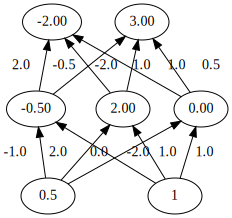

In [7]:
# define the weights
weights_input_hidden = np.array([[-1.0, 2.0, -2.0], [0.0, 1.0, 1.0]])
weights_hidden_output = np.array([[2.0, -2.0], [-0.5, 1.0], [1.0, 0.5]])

viznn([0.5, 1],weights_input_hidden,weights_hidden_output)

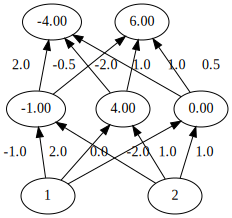

In [8]:
viznn([1, 2],weights_input_hidden,weights_hidden_output)

# Question 3

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('data.csv')
df.drop("Unnamed: 0", axis= 1, inplace=True) #drop first column
df.shape

(10000, 82)

In [4]:
df = df.apply(pd.to_numeric, errors='coerce') #check for errors (if not numeric type --nan)
df.dropna(inplace=True) #drop rows with nan
df.shape

(9358, 82)

In [5]:
# identify and replace outliers with NA
for col in df.columns:
    if df[col].dtype != object:
        outliers = (df[col] < 0) | (df[col] >= 1000)
        df.loc[outliers, col] = np.nan
df.dropna(inplace=True) #drop rows with nan
df.shape

(9357, 82)

In [6]:
## 1 ##
#split the data into training and testing sets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#build SVM and Random Forest classifiers and fit them to the training data.
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\033[32mModel: \033[31m{model}\033[0m")
    print(classification_report(y_test, y_pred))
    print(f"\033[32mConfusion Matrix:\033[0m\n{confusion_matrix(y_test, y_pred)}")
    print("-"*70)


evaluate(svm, X_test, y_test)
evaluate(rf, X_test, y_test)

Model: SVC(kernel='linear')
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1637
         1.0       0.89      0.91      0.90       235

    accuracy                           0.97      1872
   macro avg       0.94      0.95      0.94      1872
weighted avg       0.98      0.97      0.98      1872

Confusion Matrix:
[[1610   27]
 [  20  215]]
----------------------------------------------------------------------
Model: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      1637
         1.0       1.00      0.01      0.03       235

    accuracy                           0.88      1872
   macro avg       0.94      0.51      0.48      1872
weighted avg       0.89      0.88      0.82      1872

Confusion Matrix:
[[1637    0]
 [ 232    3]]
----------------------------------------------------------------------


Based on the evaluation metrics provided in the output, the SVC model appears to perform better overall. The SVC model has a higher overall accuracy (0.97) compared to the RandomForestClassifier model (0.88). Additionally, the precision and recall values for both classes are generally better for the SVC model. In contrast, the RandomForestClassifier model has a very high precision for class 1, but a very low recall, indicating that it is good at correctly identifying instances that are actually of class 1, but performs poorly at identifying all instances that belong to class 

In [11]:
#We can also perform cross-validation to get a better estimate of the model's performance.
scores_svm = cross_val_score(svm, X, y, cv=5)
scores_rf = cross_val_score(rf, X, y, cv=5)

print(f"SVM Cross-validation scores: {scores_svm}")
print(f"Random Forest Cross-validation scores: {scores_rf}")

SVM Cross-validation scores: [0.97596154 0.97115385 0.97594869 0.97862106 0.97006948]
Random Forest Cross-validation scores: [0.87980769 0.87820513 0.87814003 0.87760556 0.87867451]


For the SVM model, the cross-validation scores range from 0.970 to 0.979, with a mean cross-validation score of 0.974. This suggests that the SVM model is performing well and consistently across the different splits of the data.

For the Random Forest model, the cross-validation scores range from 0.878 to 0.879, with a mean cross-validation score of 0.878. This indicates that the Random Forest model is also performing reasonably well, but with less consistency compared to the SVM model.

Overall, the results suggest that the SVM model may be a better choice over the Random Forest model, as it is more consistent and has a higher mean cross-validation score.